In [152]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../final-project-dukeNG2012/My_Raw_Data/user_userProfile.csv')

In [43]:
df = df[3:]

In [50]:
df['User profile link'].iloc[4]

'https://www.facebook.com/profile.php?id=100010960470581&comment_id=Y29tbWVudDo3NDg5OTcyOTA1OTA5NzZfNjczNDA5MDk4MjgyMzEy&__cft__[0]=AZVeyNntvVUuLfqur0jM_a9dIjDmFn5sDaI1Lx4YZh6DvYZukkizDWddwYB-lX2ESi5Ic_PUlA4U8LgxbkdCkMq_mT8OPLIVyshR4oxBm5QCpnpyHtshVy-EyV1SzNOEx5mDksvzujIIpIXOJTVID3vY&__tn__=R]-R'

In [86]:
#! get into facebook, get to facebook link, get user info 
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
executable_path = "../MyChromeDriver/chromedriver.exe"
option1 = Options()
option1.add_argument('--disable-notifications')
# 1. Khai bao bien browser
browser  = webdriver.Chrome(executable_path=executable_path,chrome_options=option1)

# 2. M·ªü facebook
browser.get("http://facebook.com")

# 2a. ƒêi·ªÅn th√¥ng tin v√†o √¥ user v√† pass

txtUser = browser.find_element_by_id("email")
txtUser.send_keys("ledangquan287@gmail.com") # User name nick em

txtPass = browser.find_element_by_id("pass")
txtPass.send_keys("Nguyenminhduc") # Password

# 2b. l√†m xong th√¨ enter

txtPass.send_keys(Keys.ENTER)


sleep(5)
live_in = []
# 3. M·ªü URL c·ªßa post
for i in range(len(df)):
    browser.get(df['User profile link'].iloc[i])
    sleep(5)
    link = browser.find_elements_by_class_name("x1yztbdb")
    live_in.append(link[0].text)


sleep(5)

# 6. ƒê√≥ng browser
browser.close()

# #! save data to csv
df['infomation'] = live_in

IndexError: list index out of range

In [132]:
#! l·ªói t·ª´ 355 n√™n m√¨nh s·∫Ω crawl t·ª´ 366 t·ªõi h·∫øt: Vi·ªác l·ªói n√†y l√† do ng∆∞·ªùi d√πng c√≥ th·ªÉ m·∫•t fb. ƒê√≥ l√† ƒëi·ªÅu
#! kh√¥ng th·ªÉ l∆∞·ªùng tr∆∞·ªõc ƒë∆∞·ª£c.
browser  = webdriver.Chrome(executable_path=executable_path,chrome_options=option1)

# 2. M·ªü facebook
browser.get("http://facebook.com")

# 2a. ƒêi·ªÅn th√¥ng tin v√†o √¥ user v√† pass

txtUser = browser.find_element_by_id("email")
txtUser.send_keys("ledangquan287@gmail.com") # User name nick em

txtPass = browser.find_element_by_id("pass")
txtPass.send_keys("Nguyenminhduc") # Password
# 2b. l√†m xong th√¨ enter

txtPass.send_keys(Keys.ENTER)
for i in range(357,len(df)):
    browser.get(df['User profile link'].iloc[i])
    sleep(5)
    link = browser.find_elements_by_class_name("x1yztbdb")
    live_in.append(link[0].text)

sleep(5)
browser.close()

In [89]:
len(live_in) #! t√¨m xem l√† inddex out of range b·∫Øt ƒë·∫ßu t·ª´ personal profile d√≤ng n√†o 

355

In [134]:
len(live_in) #! sau khi skip qua nick √¥ng b·ªã m·∫•t nick

446

In [137]:
df_new = pd.DataFrame({'commenter':df['User name'][:446],'Infomation':live_in})

In [138]:
substring = []
for i in range(len(df_new['Infomation'])):
    for line in df_new['Infomation'].iloc[i].split("\n"):
        # print(line)
        if "Works at" in line:
            substring.append(line)
        if "Lives in" in line:
            substring.append(line)
        if "Went to" in line:
            substring.append(line)
print(substring)

['Works at Thanh H√≥a', 'Lives in H·∫£i D∆∞∆°ng', 'Went to News-THPT Th√°p Ch√†m', 'Lives in Phan Rang-Th√°p Ch√†m, Ninh Thu·∫≠n, Vietnam', 'Went to THPT Tien Du 1', 'Lives in Hanoi, Vietnam', 'Lives in Thanh H√≥a', 'Lives in Le Thuy', 'Works at THPT Tr·∫ßn H∆∞ng ƒê·∫°o - BRVT', 'Works at Benh Vien Ba Ria', 'Went to THPT Tr·∫ßn H∆∞ng ƒê·∫°o - BRVT', 'Lives in Xa Vung Tau, B√† R·ªãa-V≈©ng T√†u, Vietnam', 'Works at VIB - Ng√¢n H√†ng Qu·ªëc T·∫ø', 'Went to Tr∆∞·ªùng Qu·ªëc T·∫ø √Å Ch√¢u - Asian High School', 'Lives in Ho Chi Minh City, Vietnam', 'Lives in Hue, Vietnam', 'Went to Ngo Quyen High School', 'Went to THPT Nguy·ªÖn Du', 'Lives in Ho Chi Minh City, Vietnam', 'Went to THPT B·∫°ch ƒê·∫±ng - Th·ªßy Nguy√™n - H·∫£i Ph√≤ng', 'Lives in Hai Phong, Vietnam', 'Lives in H√† Tƒ©nh', 'Lives in Ho Chi Minh City, Vietnam', 'Lives in C√† Mau', 'Lives in Hai Phong, Vietnam', 'Lives in Hanoi, Vietnam', 'Went to Tr∆∞·ªùng THPT L√Ω T·ª± Tr·ªçng - H√† Tƒ©nh', 'Lives in Hanoi, Vietnam', 'Lives in Ho 

In [139]:
len(substring)

321

In [140]:
places = []
for string in substring:
    if "Works at" in string:
        places.append(string.replace("Works at",""))
    if "Lives in" in string:
        places.append(string.replace("Lives in",""))

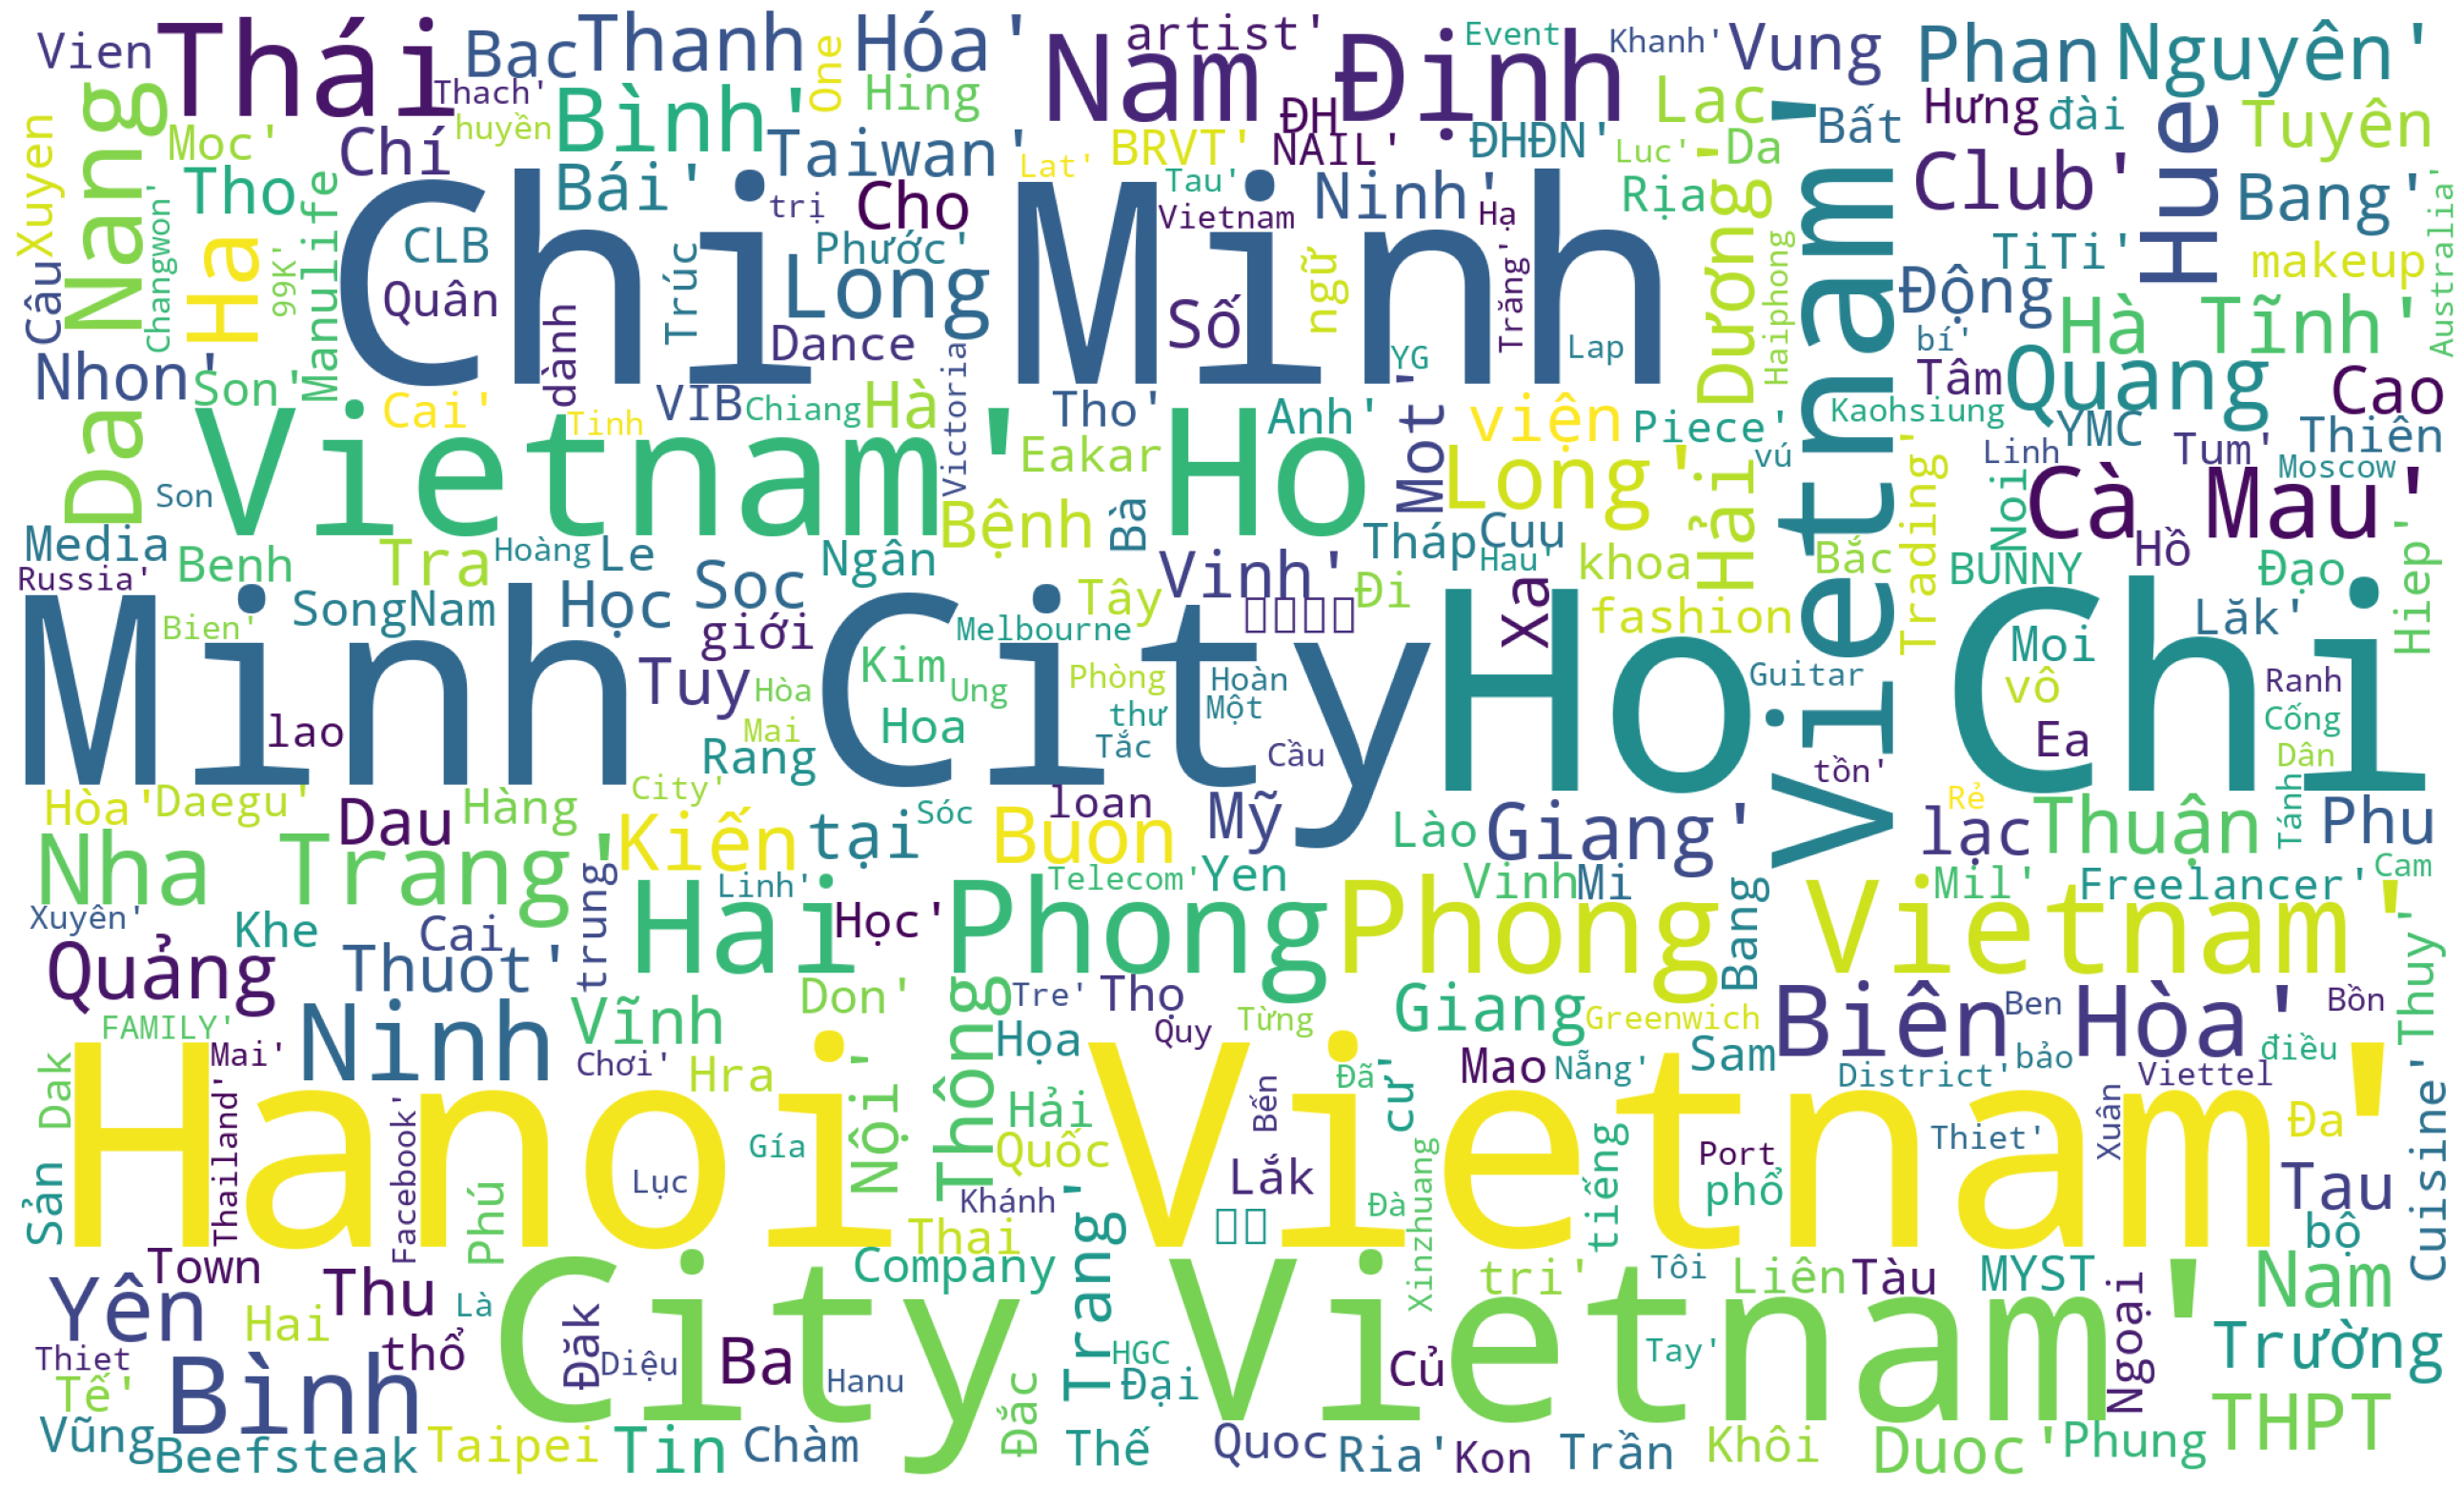

In [141]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(places))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [143]:
df_new['Infomation']

3      Intro\nDaseinzumtode üíî\nWorks at Thanh H√≥a\nFo...
4      Intro\nLives in H·∫£i D∆∞∆°ng\nFollowed by 23 peop...
5      Intro\nONLY YOU\nWent to News-THPT Th√°p Ch√†m\n...
6      Intro\nStudied at ƒêo√†n Tr∆∞·ªùng THPT Nguy·ªÖn ƒêƒÉng...
7      Intro\nhoa\nWent to THPT Tien Du 1\nLives in H...
                             ...                        
444                                                Intro
445    Intro\nJe m'aime\nWent to THPT chuy√™n L√™ H·ªìng ...
446                                       Intro\nbdinhhh
447    Intro\n~Aquarius~\nLives in Bac Giang\nFrom Ba...
448    Intro\n‚ùÄ-~‚ô° üêá\nStudies Khoa Y - Chuy√™n Ng√†nh K...
Name: Infomation, Length: 446, dtype: object

In [145]:
follow_by = []
for i in range(len(df_new['Infomation'])):
    for line in df_new['Infomation'].iloc[i].split("\n"):
        # print(line)
        if "Followed by" in line:
            follow_by.append(line)
print(follow_by)

['Followed by 800 people', 'Followed by 23 people', 'Followed by 27 people', 'Followed by 246 people', 'Followed by 264 people', 'Followed by 16 people', 'Followed by 1,901 people', 'Followed by 623 people', 'Followed by 68 people', 'Followed by 1,427 people', 'Followed by 602 people', 'Followed by 2,780 people', 'Followed by 226 people', 'Followed by 206 people', 'Followed by 699 people', 'Followed by 42 people', 'Followed by 109 people', 'Followed by 318 people', 'Followed by 97 people', 'Followed by 2 people', 'Followed by 1,913 people', 'Followed by 495 people', 'Followed by 1,472 people', 'Followed by 3,412 people', 'Followed by 1,723 people', 'Followed by 701 people', 'Followed by 2,139 people', 'Followed by 1,229 people', 'Followed by 752 people', 'Followed by 1,272 people', 'Followed by 1,354 people', 'Followed by 5,655 people', 'Followed by 2,134 people', 'Followed by 217 people', 'Followed by 1 person', 'Followed by 125 people', 'Followed by 3,038 people', 'Followed by 1,049 

In [164]:
user_follower = []
for str in follow_by:
    for follow_num in str.split(): 
        if follow_num.isdigit():
            user_follower.append(int(follow_num))

In [165]:
len(user_follower)

111

In [167]:
x = np.arange(1,len(user_follower)+1,1)
y = user_follower
user_follower_df = pd.DataFrame({'number of user':x,'followers':y})

<Axes: title={'center': 'Bi·ªÉu ƒë·ªì ph√¢n b·ªë s·ªë ng∆∞·ªùi c√≥ l∆∞·ª£t theo d√µi'}, xlabel='followers', ylabel='Count'>

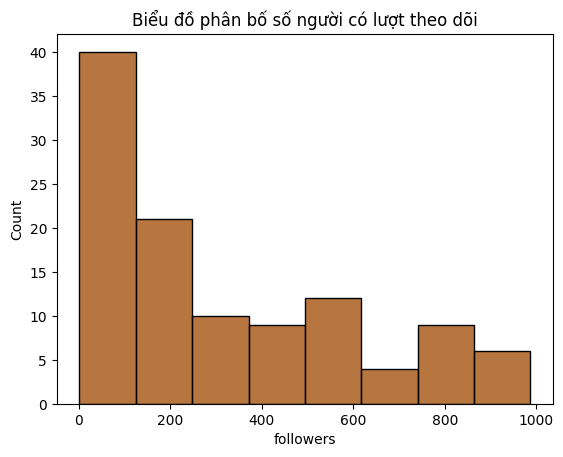

In [172]:
plt.title("Bi·ªÉu ƒë·ªì ph√¢n b·ªë s·ªë ng∆∞·ªùi c√≥ l∆∞·ª£t theo d√µi")
colors = sns.color_palette('bright')[5]
sns.histplot(data=user_follower_df,x='followers',color=colors)

<BarContainer object of 111 artists>

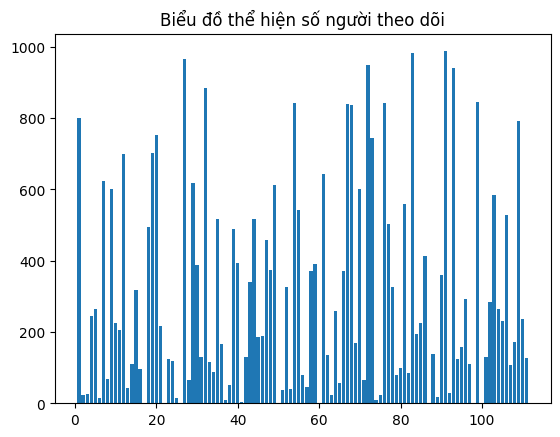

In [174]:
plt.title("Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ªë ng∆∞·ªùi theo d√µi")
plt.bar(x=user_follower_df['number of user'],height=user_follower_df['followers'])